# **Logistic Regression (Binary Classification - Polynomial Input)**

In binary classification, using polynomial features allows the logistic regression model to capture non-linear relationships between the input features and the output variable. Here, we compare the performance of logistic regression with and without polynomial transformation of the input features.

---

## **Step-by-Step Explanation**

### **1. Dataset and Target**
- **Features (`x`)**: Extracted all input columns from the `dataset`.
- **Target (`y`)**: The `output` column indicates the binary classification labels.

---

### **2. Logistic Regression Without Polynomial Features**
1. **Data Splitting**:
   - The dataset is split into training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) sets using `train_test_split`.
   - `test_size=0.2` reserves 20% of the data for testing, and `random_state=42` ensures reproducibility.

2. **Model Training**:
   - A logistic regression model is instantiated and trained using `lr.fit(x_train, y_train)`.

3. **Evaluation**:
   - The model's accuracy on the test set is computed using `lr.score(x_test, y_test)`.
   - **Result**: The accuracy without polynomial features is **62.5%**, indicating that the linear logistic regression model does not sufficiently capture the relationship between inputs and outputs.

---

### **3. Logistic Regression With Polynomial Features**
1. **Polynomial Transformation**:
   - A `PolynomialFeatures` object is created with `degree=2`, allowing the model to include quadratic terms of the input features.
   - The `fit` method is used to compute polynomial transformations, and `transform` generates the transformed data (`new_x`).
   - Example of transformations:
     - Input: $[x_1, x_2]$
     - Output: $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$ (including interaction and quadratic terms).

2. **Data Splitting**:
   - The transformed data (`new_x`) is split into training and testing sets.

3. **Model Training**:
   - A logistic regression model is trained on the polynomial-transformed data.

4. **Evaluation**:
   - The model's accuracy on the test set is computed using `lr.score(x_test, y_test)`.
   - **Result**: The accuracy improves significantly to **100%**, demonstrating that polynomial features help the model capture complex patterns in the data.

---

### **4. Logistic Regression Equation with Polynomial Features**
The logistic regression model calculates:
$$ z = m_1x_1 + m_2x_2 + m_3x_1^2 + m_4x_1x_2 + m_5x_2^2 + b $$
The sigmoid function maps $z$ to a probability:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
- If $\sigma(z) \geq 0.5$, predict `1`.
- If $\sigma(z) < 0.5`, predict `0`.

---

## **Conclusion**
Using polynomial features allows logistic regression to handle non-linear relationships, dramatically improving performance in scenarios where linear models are insufficient. In this case, the inclusion of quadratic terms increased accuracy from **62.5% to 100%**, highlighting the power of polynomial transformations in binary classification problems.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import PolynomialFeatures

In [32]:
dataset = pd.read_csv('polynomial_input.csv')
dataset.head()

,data1,data2,output
0,-2.509198,-6.297341,1
1,9.014286,0.838019,0
2,4.639879,7.458917,0
3,1.973170,4.644498,1
4,-6.879627,6.131223,0


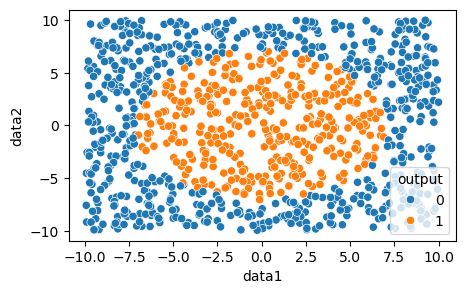

In [33]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='data1', y='data2', hue='output', data=dataset)
plt.show()

In [34]:
x = dataset.iloc[:,:-1]
y = dataset['output']

### Without Using Polynomial

In [35]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

62.5

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

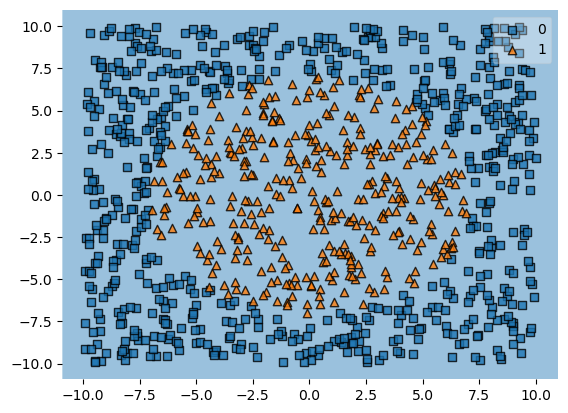

In [37]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)


### Using Polynomial

In [38]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
new_x = pd.DataFrame(pf.transform(x))
new_x.head()


,0,1,2,3,4,5
0,1.0,-2.509198,-6.297341,6.296073,15.801274,39.656509
1,1.0,9.014286,0.838019,81.257354,7.554143,0.702276
2,1.0,4.639879,7.458917,21.528476,34.608470,55.635439
3,1.0,1.973170,4.644498,3.893399,9.164382,21.571359
4,1.0,-6.879627,6.131223,47.329270,-42.180528,37.591895


In [39]:

x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=42)

In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

100.0